Applying backpropagation & gradient descent
===========================================

Feb, 2020

Trying to convince myself and my son that I can understand & derive backpropagation from first principles.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Linear Regression
-----------------

Let's see if we can find an M and B value for y = Mx + B to match a given M0 & B0 value that is used to create X,Y example  training pairs.


In [2]:
# define our function and our goal values
def fn(x,m,b):
    return m*x + b

# trying to guess these M & B values
M0 = -0.837
B0 = 0.925

# arrays of 20 "goal" values
X0 = 2*np.random.rand(20)-1
X0 = np.sort(X0)
Y0 = fn(X0,M0,B0) 

# define our cost function as Mean Square Error
# and leverage this URL's derivation of the derivative aka gradient of 
# https://medium.com/@Aj.Cheng/linear-regression-by-gradient-decent-bb198724eb2c
def MSE(y_hat,y):
    n = y_hat.shape[0]
    sqe = (y_hat - y) * (y_hat - y)
    return sqe.sum()/n

# note that the d/dm here has the vectors x and y interacting _prior_ to the sum.
# Suggest going through the calculus here yourself.
def dMSE_dm(x,y,m,b):
    n = x.shape[0]
    v = -x * (y - (m*x + b))
    v = v.sum()
    return 2*v/n

def dMSE_db(x,y,m,b):
    n = x.shape[0]
    v = -(y - (m*x + b))
    v = v.sum()
    return 2*v/n

In [3]:
# Do the gradient descent starting with an initial m,b guess
# and adjusting it slowly to improve the error
def run(X,Y,num_iterations,learning_rate):
    m = 2*np.random.rand()-1
    b = 2*np.random.rand()-1
    m_history = np.zeros(num_iterations+1)
    b_history = np.zeros(num_iterations+1)
    m_history[0] = m
    b_history[0] = b
    for i in range(num_iterations):
        Y_hat = fn(X,m,b)
        mse = MSE(Y_hat,Y)
        if i % (num_iterations//10) == 0:
            print(f"{i}: cost = {mse}")
        m_gradient = dMSE_dm(X,Y,m,b)
        b_gradient = dMSE_db(X,Y,m,b)
        m -= learning_rate * m_gradient
        b -= learning_rate * b_gradient
        m_history[i+1] = m
        b_history[i+1] = b
    return m_history,b_history

In [4]:
N = 50  # number of gradient descent steps
LR = 0.1 # learning rate 
print(f"trying to get M={M0} B={B0}")
ms,bs = run(X0,Y0,N,LR)
print(f"final guess M={ms[-1]} B={bs[-1]}")

trying to get M=-0.837 B=0.925
0: cost = 0.7179093467411326
5: cost = 0.15307353333347762
10: cost = 0.050258854663386185
15: cost = 0.020447396000830943
20: cost = 0.008892680489921515
25: cost = 0.0039348196729894775
30: cost = 0.0017484668742811502
35: cost = 0.0007777423526662764
40: cost = 0.0003460363366972976
45: cost = 0.00015396911787805855
final guess M=-0.8237302848375496 B=0.9252550356923968


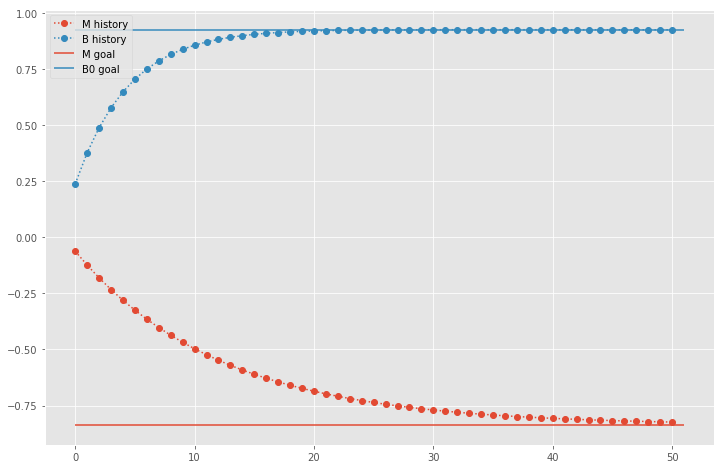

In [5]:
# See how the M & B history compares to the goal M & B values
plt.figure(figsize=(12,8))
plt.plot(ms,marker='o',linestyle="dotted",label="M history")
plt.plot(bs,marker='o',linestyle="dotted",label="B history")
plt.hlines(y=M0,xmin=0,xmax=ms.shape[0],label="M goal",colors="C0")
plt.hlines(y=B0,xmin=0,xmax=ms.shape[0],label="B0 goal",colors="C1")
plt.legend()

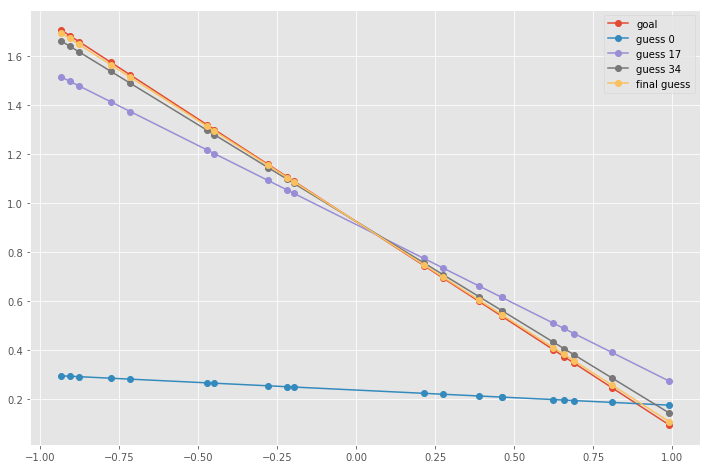

In [6]:
# let's look at how we did at approximating the line
plt.figure(figsize=(12,8))
plt.plot(X0,Y0,marker='o',label="goal")
for i in range(0,N+1,(N+1)//3):
    plt.plot(X0,fn(X0,ms[i],bs[i]),marker='o',label=f"guess {i}")
plt.plot(X0,fn(X0,ms[-1],bs[-1]),marker='o',label="final guess")
plt.legend()

Quadratic Regression
-----------------

Let's see if we can find constants for y = (Mx + B0)x + B1 = Mx^2 + B0x + B1 to match a given M0, B0 & B1 value that is used to create X,Y example training pairs.


In [7]:
# here is the new B value we want to match
B1 = -0.2

# still using X0, create a Y1 training set.
Y1 = fn(X0,fn(X0,M0,B0),B1)

In [8]:
# A little drawing of: m*x^2 + b0*x + b1
# I use y_tmp for the intermediate value.
# It goes into the "M" part of the 2nd linear function.
#  x
#    *           x
#  m  \           *
#      +--y_tmp--/ \
#     /             \
#  b0                +----> y_hat
#                   /
#                 b1
#
# the backpropagation math requires us to multiply by x prior to the summation,
# so making this a function is the clearest thing
def dMSE_dm2(x,y,m,b):
    # dMSE/dm = dMSE/dY_tmp * dY_tmp/dm
    # dMSE/dm = dMSE/dY_tmp * X
    n = x.shape[0]
    v = -x * (y - (m*x + b)) * x
    v = v.sum()
    return 2*v/n

def dMSE_db2(x,y,m,b):
    # dMSE/db = dMSE/dY_tmp * dY_tmp/db
    # dMSE/db = dMSE/dY_tmp * 1
    n = x.shape[0]
    v = -x * (y - (m*x + b)) * 1
    v = v.sum()
    return 2*v/n

# similar to run(), but adding the back propagation
def run2(X,Y,num_iterations,learning_rate):
    num_x = X.shape[0]
    m  = 2*np.random.rand()-1
    b0 = 2*np.random.rand()-1
    b1 = 2*np.random.rand()-1
    m_history = np.zeros(num_iterations+1)
    b0_history = np.zeros(num_iterations+1)
    b1_history = np.zeros(num_iterations+1)
    m_history[0] = m
    b0_history[0] = b0
    b1_history[0] = b1
    for i in range(num_iterations):
        Y_tmp = fn(X,m,b0)
        Y_hat = fn(X,Y_tmp,b1)
        mse = MSE(Y_hat,Y)
        if i % (num_iterations//10) == 0:
            print(f"{i}: cost = {mse}")
        # get gradients for last fn(X,Y_tmp,b1)
        y_tmp_gradient = dMSE_dm(X,Y,Y_tmp,b1)
        b1_gradient = dMSE_db(X,Y,Y_tmp,b1)
        b1 -= learning_rate * b1_gradient
        # back-propagate through y_tmp
        # and the previous fn(X,m,b0)
        m_gradient = dMSE_dm2(X,Y,Y_tmp,b1)
        b0_gradient = dMSE_db2(X,Y,Y_tmp,b1)
        m  -= learning_rate * m_gradient
        b0 -= learning_rate * b0_gradient
        m_history[i+1] = m
        b0_history[i+1] = b0
        b1_history[i+1] = b1
    return m_history,b0_history,b1_history

In [9]:
# Use gradient descent to find coefficients that match B0, B0 & B1
N = 200  # number of gradient descent steps
LR = 0.1 # learning rate (not ideal in order to show progress)
print(f"trying to get M={M0} B0={B0} B1={B1}")
ms2,b0s2,b1s2 = run2(X0,Y1,N,LR)
print(f"final guess M={ms2[-1]} B0={b0s2[-1]} B1={b1s2[-1]}")

trying to get M=-0.837 B0=0.925 B1=-0.2
0: cost = 0.49072906621575596
20: cost = 0.010249711905278559
40: cost = 0.0018182573198816034
60: cost = 0.0008366001878026755
80: cost = 0.0004449602915799971
100: cost = 0.00023935441209854105
120: cost = 0.00012885695597429544
140: cost = 6.937400277238386e-05
160: cost = 3.7349656182393934e-05
180: cost = 2.0108346535383703e-05
final guess M=-0.8480624772403603 B0=0.9240274669399692 B1=-0.19534951073137313


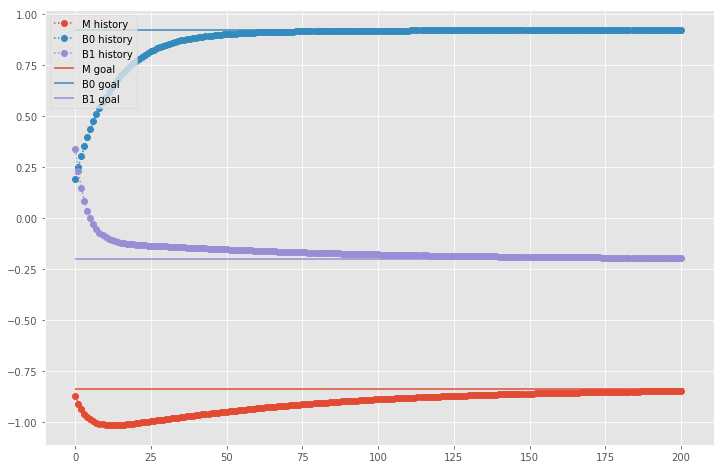

In [10]:
# Look at how the M,B0,B1 history shows going towards the goal values
plt.figure(figsize=(12,8))
plt.plot(ms2,marker='o',linestyle="dotted",label="M history")
plt.plot(b0s2,marker='o',linestyle="dotted",label="B0 history")
plt.plot(b1s2,marker='o',linestyle="dotted",label="B1 history")
plt.hlines(y=M0,xmin=0,xmax=ms2.shape[0],label="M goal",colors="C0")
plt.hlines(y=B0,xmin=0,xmax=ms2.shape[0],label="B0 goal",colors="C1")
plt.hlines(y=B1,xmin=0,xmax=ms2.shape[0],label="B1 goal",colors="C2")
plt.legend()

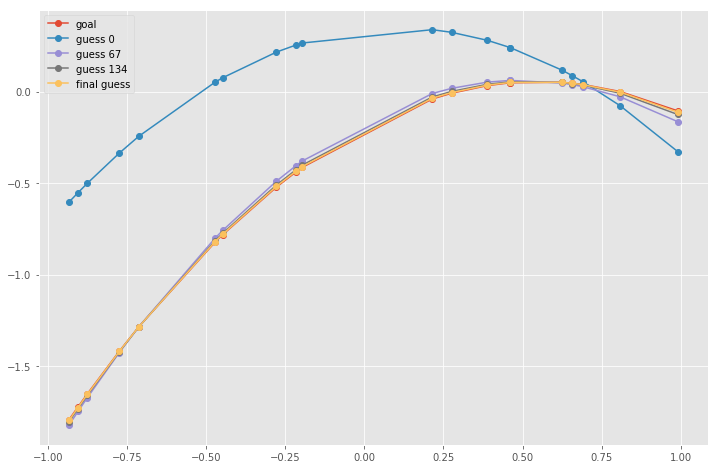

In [11]:
# Look at how we did approximating the curve
plt.figure(figsize=(12,8))
plt.plot(X0,Y1,marker='o',label="goal")
for i in range(0,N+1,(N+1)//3):
    plt.plot(X0,fn(X0,fn(X0,ms2[i],b0s2[i]),b1s2[i]),marker='o',label=f"guess {i}")
plt.plot(X0,fn(X0,fn(X0,ms2[-1],b0s2[-1]),b1s2[-1]),marker='o',label="final guess")
plt.legend()

Regression with a noisy signal?
-------------------------------

What if we add a little noise to the goal?  Will it still work?

In [12]:
Y1 += 0.2*(2*np.random.rand(20)-1)
# Use gradient descent to find coefficients that match B0, B0 & B1
N = 200  # number of gradient descent steps
LR = 0.1 # learning rate (not ideal in order to show progress)
print(f"trying to get M={M0} B0={B0} B1={B1}")
ms2,b0s2,b1s2 = run2(X0,Y1,N,LR)
print(f"final guess M={ms2[-1]} B0={b0s2[-1]} B1={b1s2[-1]}")

trying to get M=-0.837 B0=0.925 B1=-0.2
0: cost = 1.7422280939217512
20: cost = 0.041115982260508964
40: cost = 0.012606022017966586
60: cost = 0.011487380211422534
80: cost = 0.011434212858572452
100: cost = 0.011426782168200311
120: cost = 0.01142359822736407
140: cost = 0.011421915313691373
160: cost = 0.011421010432059595
180: cost = 0.01142052330029871
final guess M=-0.7770529868799422 B0=0.9091446095478053 B1=-0.2418493151751757


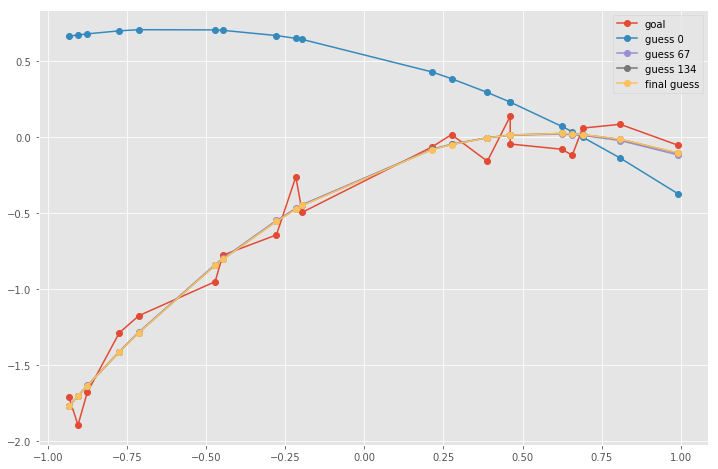

In [13]:
# Look at how we did approximating the curve
plt.figure(figsize=(12,8))
plt.plot(X0,Y1,marker='o',label="goal")
for i in range(0,N+1,(N+1)//3):
    plt.plot(X0,fn(X0,fn(X0,ms2[i],b0s2[i]),b1s2[i]),marker='o',label=f"guess {i}")
plt.plot(X0,fn(X0,fn(X0,ms2[-1],b0s2[-1]),b1s2[-1]),marker='o',label="final guess")
plt.legend()